In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
original_data=pd.read_csv("Analytics_Author_Cleaned.csv")
original_data.head()

,dcrType,article_id,byline,seo_url,sectionPath,storyKeywords,blogType,webHeadline,publishDate,pageView,cleaned_byline
0,BlogArticle,2259722,Joey Knight,florida-winless-in-bowls-for-first-time-since-...,NaN,"latest sports, Citrus, Florida, Michigan, USF",bulls,Florida winless in bowls for first time since ...,2016-01-01T23:34:49+00:00,69,JOEY KNIGHT
1,BlogArticle,2259937,Joey Knight,sun-dome-to-host-rare-top-25-matchup-sunday,NaN,"USF, UConn, women's, Associated Press, Sun Dome",bulls,Sun Dome to host rare top-25 matchup Sunday,2016-01-04T19:41:45+00:00,41,JOEY KNIGHT
2,BlogArticle,2259956,Joey Knight,thirty-days-out-bulls-2016-class-taking-solid-...,NaN,"USF, Willie Taggart, Shavar Manuel, Romeo Finl...",bulls,"Thirty days out, Bulls' 2016 class taking soli...",2016-01-04T21:38:41+00:00,367,JOEY KNIGHT
3,BlogArticle,2260089,Joey Knight,bulls-brace-for-ucfs-fall-guy,NaN,"USF, Tacko Fall, Orlando Antigua, Jahmal McMurray",bulls,Bulls brace for UCF's Fall guy,2016-01-05T22:25:59+00:00,113,JOEY KNIGHT
4,BlogArticle,2260437,Joey Knight,nba-wnba-executives-set-for-usf-lecture-series,NaN,"USF, lecture series, Scott O'Neil, Donna Orender",bulls,"NBA, WNBA executives set for USF lecture series",2016-01-07T19:58:06+00:00,183,JOEY KNIGHT


In [ ]:
# OVERVIEW OF PAGEVIEWS FOR ALL ARTICLES

In [20]:
original_sorted_by_pageView = original_data.sort_values(by=('pageView'), ascending=False)
times_produced_only = original_sorted_by_pageView[original_sorted_by_pageView['cleaned_byline'] != None]
times_produced_only.index=times_produced_only.index.astype(str)

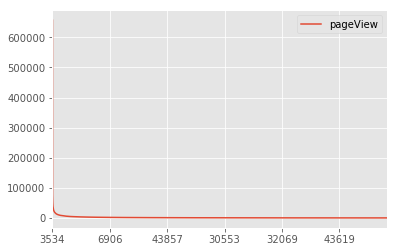

In [21]:
times_produced_only.plot.line(x=None, y=("pageView"))
